<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/07_Data_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20200507 수업 복습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

데이터 준비하기

In [2]:
noise = 0.1 # 데이터 간 떨어져 있는 분포도

In [3]:
X, Y = make_circles(n_samples = 1000, noise = noise)

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

In [6]:
from sklearn.model_selection import train_test_split # sklearn안의 model_selection을 호출 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
X_train.shape

(800, 2)

In [9]:
X_test.shape

(200, 2)

In [10]:
y_test.shape

(200,)

모델 정의하고 학습하기

In [11]:
model1 = SVC(kernel = 'rbf')

In [12]:
%%time
model1.fit(X_train, y_train) # 데이터를 가지고 decision boundary 결정 

CPU times: user 25.3 ms, sys: 1.04 ms, total: 26.3 ms
Wall time: 32.2 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
  import matplotlib as mpl
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                       np.arange(ymin, ymax, (ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(
  np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
  fig = plt.figure(figsize=(7,7))
  plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.xlabel("x1")
  plt.ylabel("x2")

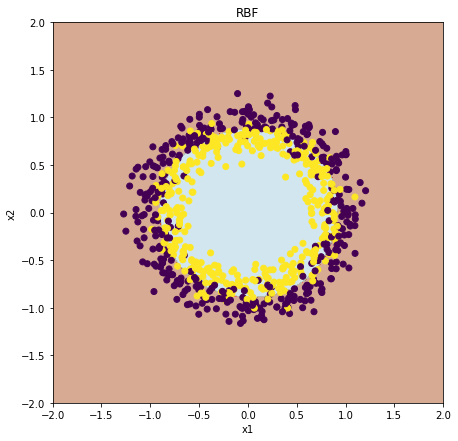

In [14]:
PlotSVM(X_train, y_train, model1, title='RBF') # train 데이터만을 가지고 그림으로 표현

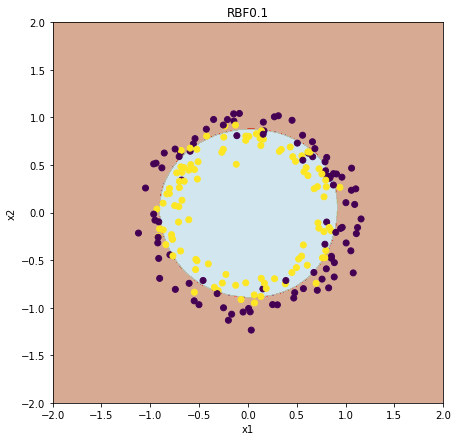

In [15]:
PlotSVM(X_test, y_test, model1, title='RBF{}'.format(noise)) #{}.format() 일종의 파이썬 약속 자세히 보면 노란색이 원 안에 있는게 맞는거임. 근데 밖에 있으니 틀린거
# 반대로 보라색이 안에 있으면 틀린거임. 밖에 있는게 맞는거 

예측(prediction)하고 평가하기

In [16]:
predictions = model1.predict(X_test)

In [17]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1])

In [18]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0])

In [19]:
model1.score(X_test, y_test)

0.83

Confusion Matrix 혼동배열

In [20]:
import pandas as pd

In [21]:
conf_matrix = pd.crosstab(y_test, predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      78  19
1      15  88


In [22]:
y_test.shape

(200,)

In [23]:
predictions.shape

(200,)